# Solving two dim non-linear system with root from scipy.optimize

In [3]:
import numpy as np
from scipy.optimize import root

In [4]:
import matplotlib.pyplot as plt

### Root finding for solving two dimensional non-linear system, with Levenberg-Marquardt solver¶

In [6]:
# ********************************************
# Consider now a set of non-linear equations
# ********************************************

# x*cos(y) = 4
# x*y - y  = 5

# We define the objective function so that 
# the Jacobian is retunrned.
# To do so we set the jac parameter to TRUE.
# The Levenberg-Marquardt solver is set with method='lm' 
def func2(x):
    f  = [x[0] * np.cos(x[1]) - 4, x[1]*x[0] - x[1] - 5]
    df = np.array(
        [[np.cos(x[1]), -x[0] * np.sin(x[1])],
        [x[1], x[0] - 1]]
                 )
    return f, df

sol = root(func2, [1, 1], jac=True, method='lm')
print (sol)

   cov_x: array([[ 0.87470958, -0.02852752],
       [-0.02852752,  0.01859874]])
    fjac: array([[ 7.52318843, -0.73161761],
       [ 0.24535902, -1.06922242]])
     fun: array([0., 0.])
    ipvt: array([2, 1], dtype=int32)
 message: 'The relative error between two consecutive iterates is at most 0.000000'
    nfev: 8
    njev: 7
     qtf: array([9.53474074e-13, 1.20388645e-13])
  status: 2
 success: True
       x: array([6.50409711, 0.90841421])


In [7]:
print (sol.x)

[6.50409711 0.90841421]


In [9]:
# Now we print both function and the Jacobian
print (func2(sol.x)) 

([0.0, 0.0], array([[ 0.61499697, -5.12867226],
       [ 0.90841421,  5.50409711]]))


In [10]:
 # the function
def funz(x):
    f = [x[0] * np.cos(x[1]) - 4, x[1]*x[0] - x[1] - 5]
    return f
# the gradient
def Gradfunz(x):
    df = np.array([[np.cos(x[1]), -x[0] * np.sin(x[1])],[x[1], x[0] - 1]])
    return df
# it returns both the function and the gradient
def func3(x):
    return funz(x), Gradfunz(x)

sol3 = root(func3, [1, 1], jac=True, method='lm')
print (sol3) # the output

   cov_x: array([[ 0.87470958, -0.02852752],
       [-0.02852752,  0.01859874]])
    fjac: array([[ 7.52318843, -0.73161761],
       [ 0.24535902, -1.06922242]])
     fun: array([0., 0.])
    ipvt: array([2, 1], dtype=int32)
 message: 'The relative error between two consecutive iterates is at most 0.000000'
    nfev: 8
    njev: 7
     qtf: array([9.53474074e-13, 1.20388645e-13])
  status: 2
 success: True
       x: array([6.50409711, 0.90841421])


In [11]:
print (sol3.x)
print (funz(sol3.x))
print (Gradfunz(sol3.x))
print (" -------------------------------------------- ")
print (sol3.fjac)

[6.50409711 0.90841421]
[0.0, 0.0]
[[ 0.61499697 -5.12867226]
 [ 0.90841421  5.50409711]]
 -------------------------------------------- 
[[ 7.52318843 -0.73161761]
 [ 0.24535902 -1.06922242]]


In [13]:
def funz(x):
    f = [x[0] * np.cos(x[1]) - 4, x[1]*x[0] - x[1] - 5]
    return f


sol3 = root(funz, [1, 1])
print (sol3)

  status: 1
 success: True
     qtf: array([  6.25677398e-08,   2.40104775e-08])
    nfev: 17
       r: array([-1.0907073 , -1.7621827 , -7.37420598])
     fun: array([  3.73212572e-12,   1.61701763e-11])
       x: array([ 6.50409711,  0.90841421])
 message: 'The solution converged.'
    fjac: array([[-0.56248005, -0.82681085],
       [ 0.82681085, -0.56248005]])


In [12]:
print (sol3.x)
print (funz(sol3.x))
print (Gradfunz(sol3.x))

[6.50409711 0.90841421]
[0.0, 0.0]
[[ 0.61499697 -5.12867226]
 [ 0.90841421  5.50409711]]


In [13]:
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
    d2x = zeros_like(P)
    d2y = zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y + 5*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = root(residual, guess, method='krylov', options={'disp': True})
#sol = root(residual, guess, method='broyden2', options={'disp': True, 'max_rank': 50})
#sol = root(residual, guess, method='anderson', options={'disp': True, 'M': 10})
print('Residual: %g' % abs(residual(sol.x)).max())


0:  |F(x)| = 803.614; step 1; tol 0.000257947
1:  |F(x)| = 345.904; step 1; tol 0.166747
2:  |F(x)| = 139.157; step 1; tol 0.145661
3:  |F(x)| = 27.3702; step 1; tol 0.0348167
4:  |F(x)| = 1.03344; step 1; tol 0.0012831
5:  |F(x)| = 0.0403495; step 1; tol 0.00137197
6:  |F(x)| = 0.0034584; step 1; tol 0.00661176
7:  |F(x)| = 0.000151398; step 1; tol 0.00172478
8:  |F(x)| = 7.72009e-06; step 1; tol 0.00234016
Residual: 4.42488e-07


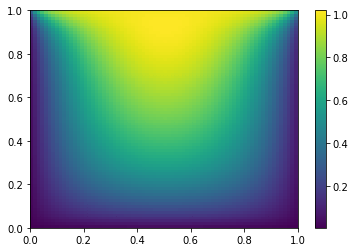

In [14]:
# visualize
import matplotlib.pyplot as plt
%matplotlib inline

x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol.x)
plt.colorbar()
plt.show()


In [9]:
print (sol.x)

[[ 0.00353016  0.00641199  0.00890225 ...,  0.2171539   0.30800119
   0.5031512 ]
 [ 0.00641131  0.01191821  0.01677778 ...,  0.39121712  0.51040234
   0.70330624]
 [ 0.00889954  0.01677439  0.02384266 ...,  0.52043197  0.63778745
   0.79837408]
 ..., 
 [ 0.00889954  0.01677439  0.02384266 ...,  0.52043197  0.63778745
   0.79837408]
 [ 0.00641131  0.01191821  0.01677778 ...,  0.39121712  0.51040234
   0.70330624]
 [ 0.00353016  0.00641199  0.00890225 ...,  0.2171539   0.30800119
   0.5031512 ]]


In [10]:
print (residual(sol.x))

[[ -1.67510974e-08   4.56750406e-08  -9.43141121e-09 ...,  -4.96416686e-09
   -1.28336834e-08   2.75274177e-08]
 [  4.37045244e-08  -3.58331560e-08   2.50612651e-08 ...,  -1.04844018e-08
   -3.94769897e-08  -1.60594338e-08]
 [ -5.92116844e-09   1.83568458e-08  -2.65793636e-08 ...,  -2.24177112e-08
   -5.07464248e-08  -1.26925128e-08]
 ..., 
 [ -6.58536781e-09   1.71820895e-08  -2.81471921e-08 ...,  -2.57569495e-08
   -5.07774613e-08  -1.40561864e-08]
 [  4.39114620e-08  -3.67109481e-08   2.43805234e-08 ...,  -1.12543743e-08
   -4.10689465e-08  -1.60823985e-08]
 [ -1.69043739e-08   4.58667726e-08  -1.06095186e-08 ...,  -5.74644599e-09
   -1.15191225e-08   2.80417369e-08]]


In [15]:
print (cosh(sol.x).mean()**2)

1.4208543076387992
